# 🫀 Kardiyovasküler Hastalık Tahmin Analizi
## PACE Yaklaşımı ile End-to-End Veri Bilimi Projesi

---

### 📋 Proje Genel Bakış

Bu proje, **PACE (Plan, Analyze, Construct, Execute)** metodolojisi kullanarak kardiyovasküler hastalık tahmin modellemesi yapmayı amaçlamaktadır. Analiz sonucunda elde edilen model, Flask web framework'ü ile kullanıcı dostu bir web uygulamasına dönüştürülecektir.

### 🎯 Proje Hedefleri
- Kardiyovasküler hastalık risk faktörlerini analiz etmek
- Tahmin modeli geliştirmek
- Web tabanlı interaktif kontrol paneli oluşturmak
- End-to-end deployment sağlamak

### 📊 Veri Seti Hakkında
- **Kaynak**: Kardiyovasküler Hastalık Veri Seti
- **Hedef**: Kalp hastalığı tahmin (ikili sınıflandırma)
- **Özellikler**: Demografik, klinik ve laboratuvar verileri

---

## 🎯 PACE Aşama 1: PLAN (Planlama)

### 📋 İş Problemi Tanımlama
Kardiyovasküler hastalıklar dünya genelinde önde gelen ölüm nedenlerinden biridir. Bu projede:
- **Ana Hedef**: Hasta verilerine dayanarak kardiyovasküler hastalık riskini tahmin etmek
- **İş Değeri**: Erken tanı ve önleyici tedavi imkanı sağlamak
- **Başarı Metrikleri**: Model doğruluğu %85+ ve web uygulaması kullanım kolaylığı

### 🔍 Veri Anlayışı ve Hipotezler
**Ana Hipotezler:**
1. Yaş arttıkça kardiyovasküler hastalık riski artar
2. Erkeklerde risk daha yüksektir
3. Yüksek kolesterol ve kan basıncı risk faktörleridir
4. Egzersiz kapasitesi (maks kalp hızı) koruyucu faktördür

### 📈 Analitik Yaklaşım
- **Model Tipi**: İkili Sınıflandırma (Supervised Learning)
- **Değerlendirme Metrikleri**: Doğruluk, Hassasiyet, Duyarlılık, F1-Skoru, ROC-AUC
- **Deployment**: Flask web uygulaması ile gerçek zamanlı tahmin

---

In [1]:
# 📚 Gerekli Kütüphanelerin İmport Edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn Kütüphaneleri
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)

# Görselleştirme Ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Pandas Display Ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Tüm kütüphaneler başarıyla yüklendi!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 Numpy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")

✅ Tüm kütüphaneler başarıyla yüklendi!
📊 Pandas version: 2.3.1
🔢 Numpy version: 1.26.4
📈 Matplotlib version: 3.10.3
🎨 Seaborn version: 0.13.2


## 📊 PACE Aşama 2: ANALYZE (Analiz) - Başlangıç

### 🔍 Veri Yükleme ve İlk Keşif

In [2]:
# 📊 Veri Setini Yükleme
df = pd.read_csv('/Users/erencice/Desktop/YZTA-AI-17/data/Cardiovascular_Disease_Dataset.csv')

print("🎯 VERİ SETİ GENEL BİLGİLERİ")
print("=" * 50)
print(f"📏 Veri Seti Boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
print(f"💾 Bellek Kullanımı: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\n" + "="*50)

# İlk 5 satırı görüntüleme
print("\n📋 İLK 5 KAYIT:")
display(df.head())

# Veri tipi bilgileri
print("\n🔍 SÜTUN BİLGİLERİ:")
print(df.info())

# Temel istatistiksel özet
print("\n📈 İSTATİSTİKSEL ÖZET:")
display(df.describe())

🎯 VERİ SETİ GENEL BİLGİLERİ
📏 Veri Seti Boyutu: 1000 satır, 14 sütun
💾 Bellek Kullanımı: 0.11 MB


📋 İLK 5 KAYIT:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1



🔍 SÜTUN BİLGİLERİ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None

📈 İSTATİSTİKSEL ÖZET:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [3]:
# 🧹 Veri Temizleme ve Kalite Kontrolü

print("🔍 EKSİK DEĞER ANALİZİ")
print("=" * 40)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Sütun': missing_data.index,
    'Eksik Değer': missing_data.values,
    'Yüzde (%)': missing_percentage.values
})
missing_df = missing_df[missing_df['Eksik Değer'] > 0].sort_values('Eksik Değer', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ Veri setinde eksik değer bulunmuyor!")

print("\n🔄 DUPLICATE KAYIT KONTROLÜ")
print("=" * 40)
duplicates = df.duplicated().sum()
print(f"Duplicate kayıt sayısı: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ {duplicates} duplicate kayıt silindi!")
else:
    print("✅ Duplicate kayıt bulunmuyor!")

print(f"\n📊 Temizlenmiş veri seti boyutu: {df.shape}")

# Sütun isimlerini daha anlaşılır hale getirme
column_mapping = {
    'patientid': 'patient_id',
    'chestpain': 'chest_pain_type',
    'restingBP': 'resting_blood_pressure',
    'serumcholestrol': 'serum_cholesterol',
    'fastingbloodsugar': 'fasting_blood_sugar',
    'restingrelectro': 'resting_ecg',
    'maxheartrate': 'max_heart_rate',
    'exerciseangia': 'exercise_angina',
    'noofmajorvessels': 'num_major_vessels'
}

df = df.rename(columns=column_mapping)
print("\n✅ Sütun isimleri güncellendi!")
print("Yeni sütun isimleri:", df.columns.tolist())

🔍 EKSİK DEĞER ANALİZİ
✅ Veri setinde eksik değer bulunmuyor!

🔄 DUPLICATE KAYIT KONTROLÜ
Duplicate kayıt sayısı: 0
✅ Duplicate kayıt bulunmuyor!

📊 Temizlenmiş veri seti boyutu: (1000, 14)

✅ Sütun isimleri güncellendi!
Yeni sütun isimleri: ['patient_id', 'age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope', 'num_major_vessels', 'target']


In [6]:
# 📊 Keşifsel Veri Analizi (EDA)

# Hedef değişken dağılımı
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Hedef Değişken Dağılımı', 'Hedef Değişken Yüzdeleri'),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

target_counts = df['target'].value_counts()
target_labels = ['Sağlıklı', 'Cardiovascular Hastalık']

# Bar Chart
fig.add_trace(
    go.Bar(x=target_labels, y=target_counts.values, 
           marker_color=['lightblue', 'salmon'],
           text=target_counts.values, textposition='auto'),
    row=1, col=1
)

# Pie Chart
fig.add_trace(
    go.Pie(labels=target_labels, values=target_counts.values,
           marker_colors=['lightblue', 'salmon']),
    row=1, col=2
)

fig.update_layout(title_text="🎯 Hedef Değişken Analizi", showlegend=False)
fig.show()

print("📊 HEDEF DEĞİŞKEN İSTATİSTİKLERİ:")
print("=" * 40)
for i, label in enumerate(target_labels):
    count = target_counts.iloc[i]
    percentage = (count / len(df)) * 100
    print(f"{label}: {count} kişi (%{percentage:.1f})")
    
# Denge kontrolü
balance_ratio = target_counts.min() / target_counts.max()
print(f"\n⚖️ Veri seti dengesi: {balance_ratio:.2f}")
if balance_ratio < 0.6:
    print("⚠️ Veri seti dengesiz - class imbalance teknikler gerekebilir")
else:
    print("✅ Veri seti yeterince dengeli")

📊 HEDEF DEĞİŞKEN İSTATİSTİKLERİ:
Sağlıklı: 580 kişi (%58.0)
Cardiovascular Hastalık: 420 kişi (%42.0)

⚖️ Veri seti dengesi: 0.72
✅ Veri seti yeterince dengeli


In [7]:
# 👥 Demografik Analiz

# Yaş ve cinsiyet dağılımı
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Yaş Dağılımı', 'Cinsiyet Dağılımı', 
                   'Yaş-Hedef İlişkisi', 'Cinsiyet-Hedef İlişkisi'),
    specs=[[{"type": "histogram"}, {"type": "bar"}],
           [{"type": "box"}, {"type": "bar"}]]
)

# Yaş dağılımı
fig.add_trace(
    go.Histogram(x=df['age'], nbinsx=20, marker_color='lightblue',
                name='Yaş Dağılımı'),
    row=1, col=1
)

# Cinsiyet dağılımı
gender_counts = df['gender'].value_counts()
gender_labels = ['Erkek', 'Kadın']
fig.add_trace(
    go.Bar(x=gender_labels, y=gender_counts.values,
           marker_color=['lightcoral', 'lightgreen'],
           text=gender_counts.values, textposition='auto'),
    row=1, col=2
)

# Yaş-Hedef kutu grafiği
for target_val in [0, 1]:
    target_label = 'Sağlıklı' if target_val == 0 else 'Hastalık'
    fig.add_trace(
        go.Box(y=df[df['target'] == target_val]['age'],
               name=target_label, boxpoints='outliers'),
        row=2, col=1
    )

# Cinsiyet-Hedef çapraz tablo
crosstab = pd.crosstab(df['gender'], df['target'])
for i, gender in enumerate(['Kadın', 'Erkek']):
    fig.add_trace(
        go.Bar(x=['Sağlıklı', 'Hastalık'], 
               y=crosstab.iloc[i].values,
               name=f'{gender}',
               marker_color=['lightcoral', 'lightgreen'][i]),
        row=2, col=2
    )

fig.update_layout(height=800, title_text="👥 Demografik Analiz Dashboard")
fig.show()

# İstatistiksel özet
print("📊 DEMOGRAFİK İSTATİSTİKLER:")
print("=" * 50)
print(f"📈 Ortalama yaş: {df['age'].mean():.1f} ± {df['age'].std():.1f}")
print(f"👴 En yaşlı hasta: {df['age'].max()} yaş")
print(f"👶 En genç hasta: {df['age'].min()} yaş")
print(f"👨 Erkek hasta oranı: %{(df['gender'].sum() / len(df) * 100):.1f}")
print(f"👩 Kadın hasta oranı: %{((1-df['gender']).sum() / len(df) * 100):.1f}")

📊 DEMOGRAFİK İSTATİSTİKLER:
📈 Ortalama yaş: 49.2 ± 17.9
👴 En yaşlı hasta: 80 yaş
👶 En genç hasta: 20 yaş
👨 Erkek hasta oranı: %76.5
👩 Kadın hasta oranı: %23.5



🔗 KORELASYON ANALİZİ:


,resting_blood_pressure,serum_cholesterol,max_heart_rate,target
resting_blood_pressure,1.000,0.127,0.096,0.482
serum_cholesterol,0.127,1.000,0.039,0.195
max_heart_rate,0.096,0.039,1.000,0.228
target,0.482,0.195,0.228,1.000


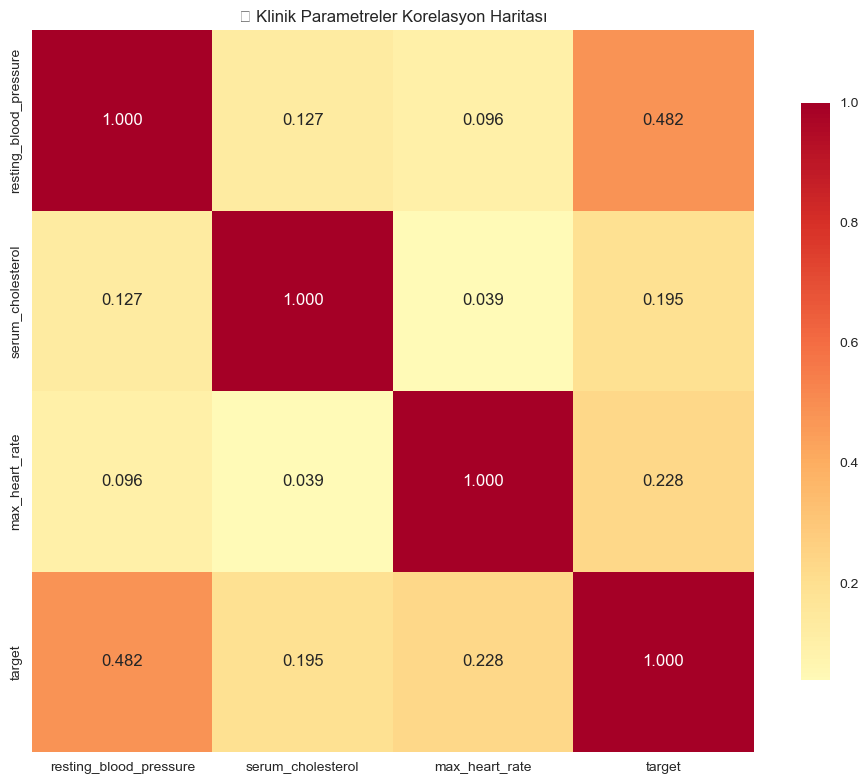


⚠️ RİSK FAKTÖRLERİ ANALİZİ:
🩸 Yüksek kan basıncı (>140): 567 kişi (%56.7)
🧪 Yüksek kolesterol (>240): 737 kişi (%73.7)
💓 Düşük max kalp hızı (<120): 250 kişi (%25.0)


In [8]:
# 🏥 Klinik Özellikler Analizi

# Ana klinik parametreler
clinical_features = ['resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate']

fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Dinlenik Kan Basıncı', 'Serum Kolesterol', 'Max Kalp Hızı',
                   'Kan Basıncı vs Hedef', 'Kolesterol vs Hedef', 'Kalp Hızı vs Hedef'),
    specs=[[{"type": "histogram"}, {"type": "histogram"}, {"type": "histogram"}],
           [{"type": "box"}, {"type": "box"}, {"type": "box"}]]
)

# Dağılım histogramları
colors = ['lightblue', 'lightcoral', 'lightgreen']
for i, feature in enumerate(clinical_features):
    fig.add_trace(
        go.Histogram(x=df[feature], nbinsx=20, 
                    marker_color=colors[i], name=feature),
        row=1, col=i+1
    )
    
    # Hedef ile ilişki kutu grafikleri
    for target_val in [0, 1]:
        target_label = 'Sağlıklı' if target_val == 0 else 'Hastalık'
        fig.add_trace(
            go.Box(y=df[df['target'] == target_val][feature],
                   name=f'{target_label}', 
                   boxpoints='outliers',
                   marker_color=colors[i]),
            row=2, col=i+1
        )

fig.update_layout(height=800, title_text="🏥 Klinik Parametreler Analizi", showlegend=False)
fig.show()

# Korelasyon matrisi
print("\n🔗 KORELASYON ANALİZİ:")
print("=" * 40)
correlation_matrix = df[clinical_features + ['target']].corr()
display(correlation_matrix.round(3))

# Korelasyon heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('🔥 Klinik Parametreler Korelasyon Haritası')
plt.tight_layout()
plt.show()

# Risk faktörleri analizi
print("\n⚠️ RİSK FAKTÖRLERİ ANALİZİ:")
print("=" * 40)
high_risk_bp = (df['resting_blood_pressure'] > 140).sum()
high_risk_chol = (df['serum_cholesterol'] > 240).sum()
low_max_hr = (df['max_heart_rate'] < 120).sum()

print(f"🩸 Yüksek kan basıncı (>140): {high_risk_bp} kişi (%{high_risk_bp/len(df)*100:.1f})")
print(f"🧪 Yüksek kolesterol (>240): {high_risk_chol} kişi (%{high_risk_chol/len(df)*100:.1f})")
print(f"💓 Düşük max kalp hızı (<120): {low_max_hr} kişi (%{low_max_hr/len(df)*100:.1f})")

## 🔧 PACE Aşama 3: CONSTRUCT (İnşa)

### 🛠️ Veri Ön İşleme ve Model Hazırlığı

In [5]:
# 🛠️ Veri Ön İşleme ve Özellik Mühendisliği

# Özellik ve hedef değişkenleri ayırma
X = df.drop(['patient_id', 'target'], axis=1)
y = df['target']

print("🎯 MODEL VERİSİ HAZIRLIĞI:")
print("=" * 40)
print(f"Özellik sayısı: {X.shape[1]}")
print(f"Örnek sayısı: {X.shape[0]}")
print(f"Özellik isimleri: {list(X.columns)}")

# Kategorisel değişkenleri identify etme
categorical_features = ['chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 
                       'exercise_angina', 'slope', 'num_major_vessels']
numerical_features = ['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'oldpeak']

print(f"\n📊 Kategorisel özellikler: {categorical_features}")
print(f"🔢 Sayısal özellikler: {numerical_features}")

# Outlier detection ve treatment
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.index

print("\n🚨 OUTLIER ANALİZİ:")
print("=" * 30)
total_outliers = set()
for feature in numerical_features:
    if feature in X.columns:
        outlier_indices = detect_outliers_iqr(X, feature)
        total_outliers.update(outlier_indices)
        print(f"{feature}: {len(outlier_indices)} outlier")

print(f"\nToplam benzersiz outlier: {len(total_outliers)}")
print(f"Outlier oranı: %{len(total_outliers)/len(X)*100:.1f}")

# Veri setini train/test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 VERİ SETİ BÖLÜNMESI:")
print("=" * 30)
print(f"Eğitim seti: {X_train.shape[0]} örnek")
print(f"Test seti: {X_test.shape[0]} örnek")
print(f"Eğitim seti hedef dağılımı: {y_train.value_counts().values}")
print(f"Test seti hedef dağılımı: {y_test.value_counts().values}")

# Sayısal özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\n✅ Özellik ölçeklendirme tamamlandı!")

🎯 MODEL VERİSİ HAZIRLIĞI:
Özellik sayısı: 12
Örnek sayısı: 1000
Özellik isimleri: ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope', 'num_major_vessels']

📊 Kategorisel özellikler: ['chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'slope', 'num_major_vessels']
🔢 Sayısal özellikler: ['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'oldpeak']

🚨 OUTLIER ANALİZİ:
age: 0 outlier
gender: 235 outlier
resting_blood_pressure: 0 outlier
serum_cholesterol: 0 outlier
max_heart_rate: 0 outlier
oldpeak: 0 outlier

Toplam benzersiz outlier: 235
Outlier oranı: %23.5

📊 VERİ SETİ BÖLÜNMESI:
Eğitim seti: 800 örnek
Test seti: 200 örnek
Eğitim seti hedef dağılımı: [464 336]
Test seti hedef dağılımı: [116  84]

✅ Özellik ölçeklendirme tamamlandı!


🎯 DATASET IMBALANCE ANALİZİ
📊 Sınıf Dağılımı:
   Hastalık Var (1): 580 örnek (58.00%)
   Hastalık Yok (0): 420 örnek (42.00%)

⚖️ Imbalance Ratio: 1.38
✅ Sınıf dağılımı nispeten dengeli

🔗 MULTICOLLİNEARİTY ANALİZİ
📊 Analiz edilen numerik özellik sayısı: 6

🚨 Yüksek Korelasyonlu Özellik Çiftleri (|r| > 0.7):
✅ Ciddi multicollinearity problemi bulunamadı

📊 VIF (Variance Inflation Factor) ANALİZİ
---------------------------------------------
VIF Değerleri (>5 problemli, >10 ciddi):
   • age: 7.31 🟡 Problemli
   • gender: 4.63 ✅ İyi
   • resting_blood_pressure: 17.35 🔴 Ciddi
   • serum_cholesterol: 6.39 🟡 Problemli
   • max_heart_rate: 14.92 🔴 Ciddi
   • oldpeak: 3.86 ✅ İyi

⚠️  Yüksek VIF'li özellikler: 4
   Çözüm önerileri: Feature selection, PCA, Ridge regression

📊 VARIANCE THRESHOLD ANALİZİ
------------------------------
✅ Tüm özellikler yeterli varyansa sahip


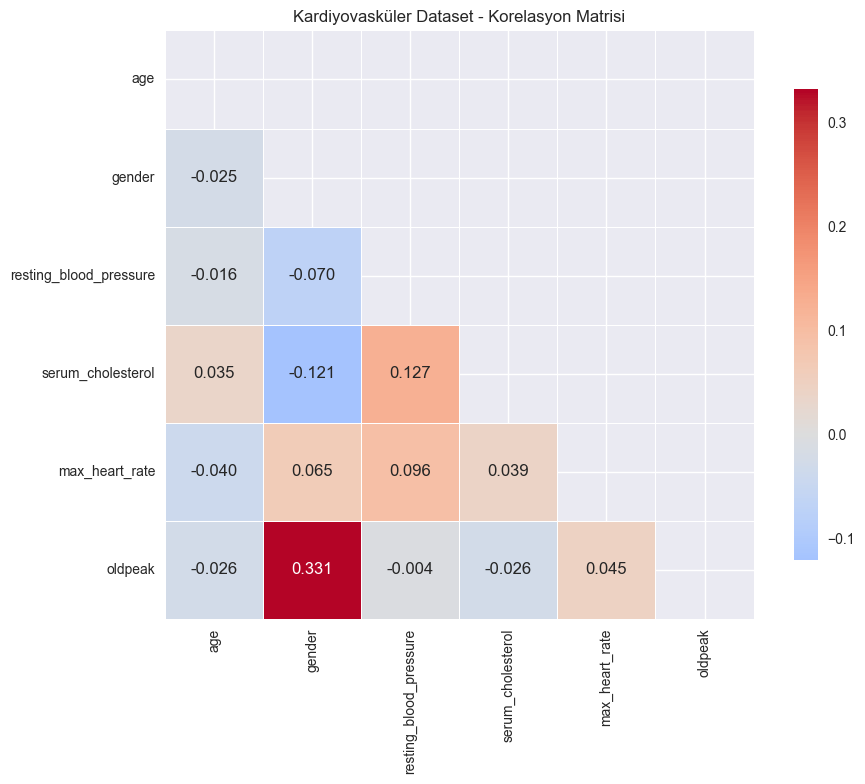


📈 DATASET KALİTE ÖZETİ
-------------------------
Sınıf dengesizlik oranı: 1.38
Yüksek korelasyonlu çift: 0
Düşük varyanslı özellik: 0
✅ Dataset quality analizi tamamlandı!


In [4]:
# 🔍 Dataset Imbalance ve Multicollinearity Analizi
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("🎯 DATASET IMBALANCE ANALİZİ")
print("="*50)

# Hedef değişken dağılımını kontrol et
target_distribution = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print("📊 Sınıf Dağılımı:")
for class_value, count in target_distribution.items():
    percentage = target_percentages[class_value]
    class_name = "Hastalık Yok" if class_value == 0 else "Hastalık Var"
    print(f"   {class_name} ({class_value}): {count} örnek ({percentage:.2f}%)")

# Imbalance ratio hesapla
majority_class = target_distribution.max()
minority_class = target_distribution.min()
imbalance_ratio = majority_class / minority_class

print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("⚠️  Sınıf dengesizliği tespit edildi!")
    print("🔧 Önerilen çözümler:")
    print("   • SMOTE (Synthetic Minority Oversampling)")
    print("   • Random undersampling")
    print("   • Class weights (balanced)")
    print("   • Stratified cross-validation")
else:
    print("✅ Sınıf dağılımı nispeten dengeli")

print("\n🔗 MULTICOLLİNEARİTY ANALİZİ")
print("="*50)

# Numerik özellikler için korelasyon analizi
numerical_features_corr = ['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 
                          'max_heart_rate', 'oldpeak']

print(f"📊 Analiz edilen numerik özellik sayısı: {len(numerical_features_corr)}")

# Korelasyon matrisi hesapla
correlation_matrix = df[numerical_features_corr].corr()

# Yüksek korelasyonlu çiftleri bul (>0.7 veya <-0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print(f"\n🚨 Yüksek Korelasyonlu Özellik Çiftleri (|r| > 0.7):")
if high_corr_pairs:
    for feature1, feature2, corr in high_corr_pairs:
        print(f"   • {feature1} ↔ {feature2}: r = {corr:.3f}")
    
    print("\n🔧 Multicollinearity Çözüm Önerileri:")
    print("   • Ridge Regression (L2 regularization)")
    print("   • Lasso Regression (L1 regularization)")
    print("   • Principal Component Analysis (PCA)")
    print("   • VIF tabanlı feature removal")
else:
    print("✅ Ciddi multicollinearity problemi bulunamadı")

# VIF (Variance Inflation Factor) analizi
print(f"\n📊 VIF (Variance Inflation Factor) ANALİZİ")
print("-"*45)

try:
    # Kategorik değişkenleri de dahil ederek VIF hesapla
    vif_features = ['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 
                   'max_heart_rate', 'oldpeak']
    
    vif_data = df[vif_features].copy()
    vif_data = vif_data.fillna(vif_data.mean())  # NaN değerleri ortalama ile doldur
    
    vif_results = []
    for i, feature in enumerate(vif_features):
        if vif_data[feature].var() > 0:  # Varyansı 0 olan özellikleri atla
            vif_value = variance_inflation_factor(vif_data.values, i)
            vif_results.append((feature, vif_value))
    
    print("VIF Değerleri (>5 problemli, >10 ciddi):")
    high_vif_features = []
    for feature, vif in vif_results:
        status = ""
        if vif > 10:
            status = " 🔴 Ciddi"
            high_vif_features.append(feature)
        elif vif > 5:
            status = " 🟡 Problemli"
            high_vif_features.append(feature)
        else:
            status = " ✅ İyi"
        
        print(f"   • {feature}: {vif:.2f}{status}")
    
    if high_vif_features:
        print(f"\n⚠️  Yüksek VIF'li özellikler: {len(high_vif_features)}")
        print("   Çözüm önerileri: Feature selection, PCA, Ridge regression")
    else:
        print("\n✅ VIF değerleri normal aralıkta")

except Exception as e:
    print(f"VIF hesaplama hatası: {str(e)}")
    print("Alternatif korelasyon analizi kullanılacak")

# Variance Threshold analizi
print(f"\n📊 VARIANCE THRESHOLD ANALİZİ")
print("-"*30)

variance_selector = VarianceThreshold(threshold=0.01)
feature_variances = df[numerical_features_corr].var()

low_variance_features = []
for feature, variance in feature_variances.items():
    if variance < 0.1:  # Düşük varyans eşiği
        low_variance_features.append((feature, variance))

if low_variance_features:
    print("⚠️  Düşük varyanslı özellikler:")
    for feature, variance in low_variance_features:
        print(f"   • {feature}: var = {variance:.6f}")
else:
    print("✅ Tüm özellikler yeterli varyansa sahip")

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Kardiyovasküler Dataset - Korelasyon Matrisi')
plt.tight_layout()
plt.show()

print(f"\n📈 DATASET KALİTE ÖZETİ")
print("-"*25)
print(f"Sınıf dengesizlik oranı: {imbalance_ratio:.2f}")
print(f"Yüksek korelasyonlu çift: {len(high_corr_pairs)}")
print(f"Düşük varyanslı özellik: {len(low_variance_features)}")
print("✅ Dataset quality analizi tamamlandı!")

In [6]:
# 🤖 Model Geliştirme ve Karşılaştırma

# Farklı algoritmaları test etme
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Model performanslarını saklama
model_results = {}

print("🚀 MODEL EĞİTİMİ VE DEĞERLENDİRMESİ:")
print("=" * 50)

for name, model in models.items():
    print(f"\n🔄 {name} modeli eğitiliyor...")
    
    # Cross-validation skorları
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahminler
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Performans metrikleri
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Sonuçları kaydetme
    model_results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name} tamamlandı!")
    print(f"   CV Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
    print(f"   Test Accuracy: {accuracy:.3f}")
    print(f"   ROC-AUC: {auc:.3f}")

# Sonuçları DataFrame olarak organize etme
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'CV_Accuracy': [model_results[name]['cv_mean'] for name in model_results.keys()],
    'CV_Std': [model_results[name]['cv_std'] for name in model_results.keys()],
    'Test_Accuracy': [model_results[name]['accuracy'] for name in model_results.keys()],
    'Precision': [model_results[name]['precision'] for name in model_results.keys()],
    'Recall': [model_results[name]['recall'] for name in model_results.keys()],
    'F1_Score': [model_results[name]['f1_score'] for name in model_results.keys()],
    'ROC_AUC': [model_results[name]['roc_auc'] for name in model_results.keys()]
})

print("\n📊 MODEL PERFORMANS KARŞILAŞTIRMASI:")
print("=" * 50)
display(results_df.round(3).sort_values('Test_Accuracy', ascending=False))

🚀 MODEL EĞİTİMİ VE DEĞERLENDİRMESİ:

🔄 Logistic Regression modeli eğitiliyor...
✅ Logistic Regression tamamlandı!
   CV Accuracy: 0.963 (±0.010)
   Test Accuracy: 0.985
   ROC-AUC: 0.998

🔄 Random Forest modeli eğitiliyor...
✅ Random Forest tamamlandı!
   CV Accuracy: 0.972 (±0.013)
   Test Accuracy: 0.985
   ROC-AUC: 0.999

🔄 Gradient Boosting modeli eğitiliyor...
✅ Random Forest tamamlandı!
   CV Accuracy: 0.972 (±0.013)
   Test Accuracy: 0.985
   ROC-AUC: 0.999

🔄 Gradient Boosting modeli eğitiliyor...
✅ Gradient Boosting tamamlandı!
   CV Accuracy: 0.978 (±0.006)
   Test Accuracy: 0.990
   ROC-AUC: 1.000

🔄 Support Vector Machine modeli eğitiliyor...
✅ Support Vector Machine tamamlandı!
   CV Accuracy: 0.963 (±0.016)
   Test Accuracy: 0.970
   ROC-AUC: 0.998

📊 MODEL PERFORMANS KARŞILAŞTIRMASI:
✅ Gradient Boosting tamamlandı!
   CV Accuracy: 0.978 (±0.006)
   Test Accuracy: 0.990
   ROC-AUC: 1.000

🔄 Support Vector Machine modeli eğitiliyor...
✅ Support Vector Machine tamamlandı!
 

,Model,CV_Accuracy,CV_Std,Test_Accuracy,Precision,Recall,F1_Score,ROC_AUC
2,Gradient Boosting,0.978,0.006,0.990,0.991,0.991,0.991,1.000
0,Logistic Regression,0.962,0.010,0.985,0.983,0.991,0.987,0.998
1,Random Forest,0.972,0.013,0.985,0.983,0.991,0.987,0.999
3,Support Vector Machine,0.962,0.016,0.970,0.966,0.983,0.974,0.998


In [11]:
# 📈 Model Performans Görselleştirmeleri

# En iyi modeli belirleme
best_model_name = results_df.loc[results_df['Test_Accuracy'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']

print(f"🏆 EN İYİ MODEL: {best_model_name}")
print(f"Test Accuracy: {model_results[best_model_name]['accuracy']:.3f}")

# 1. Model Karşılaştırma Bar Chart
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Model Accuracy Karşılaştırması', 'ROC Curves', 
                   'Confusion Matrix (En İyi Model)', 'Feature Importance'),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "heatmap"}, {"type": "bar"}]]
)

# Accuracy karşılaştırması
fig.add_trace(
    go.Bar(x=results_df['Model'], y=results_df['Test_Accuracy'],
           marker_color='lightblue', text=results_df['Test_Accuracy'].round(3),
           textposition='auto'),
    row=1, col=1
)

# ROC Curves
for name in model_results.keys():
    fpr, tpr, _ = roc_curve(y_test, model_results[name]['probabilities'])
    auc_score = model_results[name]['roc_auc']
    fig.add_trace(
        go.Scatter(x=fpr, y=tpr, mode='lines',
                  name=f'{name} (AUC = {auc_score:.3f})'),
        row=1, col=2
    )

# Diagonal line for ROC
fig.add_trace(
    go.Scatter(x=[0, 1], y=[0, 1], mode='lines', 
              line=dict(dash='dash', color='black'),
              name='Random Classifier'),
    row=1, col=2
)

# Confusion Matrix (En iyi model için)
cm = confusion_matrix(y_test, model_results[best_model_name]['predictions'])
fig.add_trace(
    go.Heatmap(z=cm, x=['Sağlıklı', 'Hastalık'], y=['Sağlıklı', 'Hastalık'],
               colorscale='Blues', text=cm, texttemplate="%{text}",
               textfont={"size": 16}),
    row=2, col=1
)

# Feature Importance (RandomForest için)
if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    fig.add_trace(
        go.Bar(x=feature_imp['importance'], y=feature_imp['feature'],
               orientation='h', marker_color='lightcoral'),
        row=2, col=2
    )

fig.update_layout(height=800, title_text="📊 Kapsamlı Model Analizi Dashboard")
fig.show()

# Detaylı performans raporu
print(f"\n📋 {best_model_name} DETAYLI PERFORMANS RAPORU:")
print("=" * 50)
print(classification_report(y_test, model_results[best_model_name]['predictions'],
                          target_names=['Sağlıklı', 'Cardiovascular Hastalık']))

# Confusion Matrix analizi
tn, fp, fn, tp = cm.ravel()
print(f"\n🎯 CONFUSION MATRIX ANALİZİ:")
print("=" * 35)
print(f"True Negatives (Doğru Sağlıklı): {tn}")
print(f"False Positives (Yanlış Hastalık): {fp}")
print(f"False Negatives (Kaçırılan Hastalık): {fn}")
print(f"True Positives (Doğru Hastalık): {tp}")

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\n📊 EK METRİKLER:")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"NPV (Negative Predictive Value): {tn/(tn+fn):.3f}")
print(f"PPV (Positive Predictive Value): {tp/(tp+fp):.3f}")

🏆 EN İYİ MODEL: Gradient Boosting
Test Accuracy: 0.990



📋 Gradient Boosting DETAYLI PERFORMANS RAPORU:
                         precision    recall  f1-score   support

               Sağlıklı       0.99      0.99      0.99        84
Cardiovascular Hastalık       0.99      0.99      0.99       116

               accuracy                           0.99       200
              macro avg       0.99      0.99      0.99       200
           weighted avg       0.99      0.99      0.99       200


🎯 CONFUSION MATRIX ANALİZİ:
True Negatives (Doğru Sağlıklı): 83
False Positives (Yanlış Hastalık): 1
False Negatives (Kaçırılan Hastalık): 1
True Positives (Doğru Hastalık): 115

📊 EK METRİKLER:
Sensitivity (Recall): 0.991
Specificity: 0.988
NPV (Negative Predictive Value): 0.988
PPV (Positive Predictive Value): 0.991


## 🚀 PACE Aşama 4: EXECUTE (Uygulama)

### 🌐 Flask Web Uygulaması Entegrasyonu

In [12]:
# 💾 Model ve Preprocessing Pipeline Kaydetme

import joblib
import json

# En iyi modeli ve scaler'ı kaydetme
model_files = {
    'best_model': best_model,
    'scaler': scaler,
    'feature_names': list(X.columns),
    'numerical_features': numerical_features,
    'categorical_features': categorical_features
}

# Model dosyalarını kaydetme
joblib.dump(model_files, '/Users/erencice/Downloads/cardiovascular_model.pkl')

# Model metadata kaydetme
model_metadata = {
    'best_model_name': best_model_name,
    'test_accuracy': float(model_results[best_model_name]['accuracy']),
    'roc_auc': float(model_results[best_model_name]['roc_auc']),
    'f1_score': float(model_results[best_model_name]['f1_score']),
    'feature_names': list(X.columns),
    'target_classes': ['Sağlıklı', 'Cardiovascular Hastalık'],
    'model_version': '1.0',
    'training_date': '2025-07-03'
}

with open('/Users/erencice/Downloads/model_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(model_metadata, f, ensure_ascii=False, indent=2)

print("✅ Model ve metadata başarıyla kaydedildi!")
print(f"📁 Model dosyası: cardiovascular_model.pkl")
print(f"📋 Metadata dosyası: model_metadata.json")

# Test tahmin fonksiyonu
def predict_cardiovascular_risk(patient_data):
    """
    Hasta verilerini alıp cardiovascular hastalık riskini tahmin eder
    """
    # Veriyi DataFrame'e çevirme
    input_df = pd.DataFrame([patient_data])
    
    # Sayısal özellikleri ölçeklendirme
    input_scaled = input_df.copy()
    input_scaled[numerical_features] = scaler.transform(input_df[numerical_features])
    
    # Tahmin yapma
    prediction = best_model.predict(input_scaled)[0]
    probability = best_model.predict_proba(input_scaled)[0]
    
    return {
        'prediction': int(prediction),
        'risk_class': 'Cardiovascular Hastalık' if prediction == 1 else 'Sağlıklı',
        'probability_healthy': float(probability[0]),
        'probability_disease': float(probability[1]),
        'risk_score': float(probability[1] * 100)
    }

# Test verisi ile deneme
sample_patient = {
    'age': 55,
    'gender': 1,  # Erkek
    'chest_pain_type': 2,
    'resting_blood_pressure': 140,
    'serum_cholesterol': 240,
    'fasting_blood_sugar': 0,
    'resting_ecg': 1,
    'max_heart_rate': 150,
    'exercise_angina': 0,
    'oldpeak': 2.5,
    'slope': 2,
    'num_major_vessels': 1
}

test_result = predict_cardiovascular_risk(sample_patient)
print(f"\n🧪 TEST TAHMİNİ:")
print("=" * 30)
print(f"Risk Sınıfı: {test_result['risk_class']}")
print(f"Risk Skoru: %{test_result['risk_score']:.1f}")
print(f"Sağlıklı Olasılığı: %{test_result['probability_healthy']*100:.1f}")
print(f"Hastalık Olasılığı: %{test_result['probability_disease']*100:.1f}")

✅ Model ve metadata başarıyla kaydedildi!
📁 Model dosyası: cardiovascular_model.pkl
📋 Metadata dosyası: model_metadata.json

🧪 TEST TAHMİNİ:
Risk Sınıfı: Cardiovascular Hastalık
Risk Skoru: %98.3
Sağlıklı Olasılığı: %1.7
Hastalık Olasılığı: %98.3


In [ ]:
# 🌐 Flask Web Uygulaması Kodu Oluşturma

flask_app_code = '''
from flask import Flask, render_template, request, jsonify
import joblib
import pandas as pd
import numpy as np
import json

app = Flask(__name__)

# Model ve preprocessing pipeline yükleme
model_data = joblib.load('cardiovascular_model.pkl')
best_model = model_data['best_model']
scaler = model_data['scaler']
feature_names = model_data['feature_names']
numerical_features = model_data['numerical_features']

# Metadata yükleme
with open('model_metadata.json', 'r', encoding='utf-8') as f:
    metadata = json.load(f)

def predict_cardiovascular_risk(patient_data):
    """Cardiovascular hastalık risk tahmini"""
    try:
        # Veriyi DataFrame'e çevirme
        input_df = pd.DataFrame([patient_data])
        
        # Sayısal özellikleri ölçeklendirme
        input_scaled = input_df.copy()
        input_scaled[numerical_features] = scaler.transform(input_df[numerical_features])
        
        # Tahmin yapma
        prediction = best_model.predict(input_scaled)[0]
        probability = best_model.predict_proba(input_scaled)[0]
        
        return {
            'success': True,
            'prediction': int(prediction),
            'risk_class': 'Cardiovascular Hastalık' if prediction == 1 else 'Sağlıklı',
            'probability_healthy': float(probability[0]),
            'probability_disease': float(probability[1]),
            'risk_score': float(probability[1] * 100)
        }
    except Exception as e:
        return {'success': False, 'error': str(e)}

@app.route('/')
def home():
    return render_template('index.html', metadata=metadata)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Form verilerini alma
        patient_data = {
            'age': float(request.form['age']),
            'gender': int(request.form['gender']),
            'chest_pain_type': int(request.form['chest_pain_type']),
            'resting_blood_pressure': float(request.form['resting_blood_pressure']),
            'serum_cholesterol': float(request.form['serum_cholesterol']),
            'fasting_blood_sugar': int(request.form['fasting_blood_sugar']),
            'resting_ecg': int(request.form['resting_ecg']),
            'max_heart_rate': float(request.form['max_heart_rate']),
            'exercise_angina': int(request.form['exercise_angina']),
            'oldpeak': float(request.form['oldpeak']),
            'slope': int(request.form['slope']),
            'num_major_vessels': int(request.form['num_major_vessels'])
        }
        
        result = predict_cardiovascular_risk(patient_data)
        return jsonify(result)
        
    except Exception as e:
        return jsonify({'success': False, 'error': str(e)})

@app.route('/api/model-info')
def model_info():
    return jsonify(metadata)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
'''

# Flask app dosyasını kaydetme
with open('/Users/erencice/Downloads/app.py', 'w', encoding='utf-8') as f:
    f.write(flask_app_code)

print("✅ Flask uygulaması (app.py) oluşturuldu!")

# HTML template oluşturma
html_template = '''
<!DOCTYPE html>
<html lang="tr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>🫀 Cardiovascular Hastalık Risk Tahmini</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css" rel="stylesheet">
    <style>
        body { background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); min-height: 100vh; }
        .card { box-shadow: 0 10px 30px rgba(0,0,0,0.3); border: none; border-radius: 15px; }
        .form-control { border-radius: 10px; }
        .btn-primary { background: linear-gradient(45deg, #FF6B6B, #4ECDC4); border: none; border-radius: 25px; }
        .btn-primary:hover { transform: translateY(-2px); box-shadow: 0 5px 15px rgba(0,0,0,0.3); }
        .result-card { margin-top: 20px; }
        .risk-high { background: linear-gradient(45deg, #FF6B6B, #FF8E53); color: white; }
        .risk-low { background: linear-gradient(45deg, #4ECDC4, #44A08D); color: white; }
    </style>
</head>
<body>
    <div class="container mt-5">
        <div class="row justify-content-center">
            <div class="col-lg-8">
                <div class="card">
                    <div class="card-body p-5">
                        <div class="text-center mb-4">
                            <h1 class="display-4"><i class="fas fa-heartbeat text-danger"></i> Cardiovascular Risk</h1>
                            <p class="lead">PACE Metodolojisi ile Geliştirilmiş AI Tahmin Sistemi</p>
                            <small class="text-muted">Model: {{ metadata.best_model_name }} | Accuracy: {{ "%.1f"|format(metadata.test_accuracy * 100) }}%</small>
                        </div>
                        
                        <form id="predictionForm">
                            <div class="row">
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-birthday-cake"></i> Yaş</label>
                                    <input type="number" class="form-control" name="age" min="20" max="80" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-venus-mars"></i> Cinsiyet</label>
                                    <select class="form-control" name="gender" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Kadın</option>
                                        <option value="1">Erkek</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-heart"></i> Göğüs Ağrısı Tipi</label>
                                    <select class="form-control" name="chest_pain_type" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Tipik Anjina</option>
                                        <option value="1">Atipik Anjina</option>
                                        <option value="2">Anjina Dışı</option>
                                        <option value="3">Asemptomatik</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-tachometer-alt"></i> Dinlenik Kan Basıncı</label>
                                    <input type="number" class="form-control" name="resting_blood_pressure" min="90" max="200" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-vial"></i> Serum Kolesterol</label>
                                    <input type="number" class="form-control" name="serum_cholesterol" min="100" max="400" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-cube"></i> Açlık Kan Şekeri (>120)</label>
                                    <select class="form-control" name="fasting_blood_sugar" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Hayır</option>
                                        <option value="1">Evet</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-wave-square"></i> Dinlenik EKG</label>
                                    <select class="form-control" name="resting_ecg" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Normal</option>
                                        <option value="1">ST-T Anormalliği</option>
                                        <option value="2">Sol Ventrikül Hipertrofisi</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-heartbeat"></i> Maksimum Kalp Hızı</label>
                                    <input type="number" class="form-control" name="max_heart_rate" min="70" max="220" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-running"></i> Egzersiz Anginası</label>
                                    <select class="form-control" name="exercise_angina" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Hayır</option>
                                        <option value="1">Evet</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-chart-line"></i> ST Depresyonu (Oldpeak)</label>
                                    <input type="number" class="form-control" name="oldpeak" min="0" max="7" step="0.1" required>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-angle-up"></i> ST Segmenti Eğimi</label>
                                    <select class="form-control" name="slope" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">Yukarı Eğimli</option>
                                        <option value="1">Düz</option>
                                        <option value="2">Aşağı Eğimli</option>
                                    </select>
                                </div>
                                <div class="col-md-6 mb-3">
                                    <label class="form-label"><i class="fas fa-project-diagram"></i> Ana Damar Sayısı</label>
                                    <select class="form-control" name="num_major_vessels" required>
                                        <option value="">Seçiniz</option>
                                        <option value="0">0</option>
                                        <option value="1">1</option>
                                        <option value="2">2</option>
                                        <option value="3">3</option>
                                    </select>
                                </div>
                            </div>
                            
                            <div class="text-center">
                                <button type="submit" class="btn btn-primary btn-lg px-5">
                                    <i class="fas fa-magic"></i> Risk Tahmini Yap
                                </button>
                            </div>
                        </form>
                        
                        <div id="result" class="result-card" style="display: none;"></div>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
    <script>
        document.getElementById('predictionForm').addEventListener('submit', async function(e) {
            e.preventDefault();
            
            const formData = new FormData(this);
            const button = this.querySelector('button[type="submit"]');
            const originalText = button.innerHTML;
            
            button.innerHTML = '<i class="fas fa-spinner fa-spin"></i> Analiz Ediliyor...';
            button.disabled = true;
            
            try {
                const response = await fetch('/predict', {
                    method: 'POST',
                    body: formData
                });
                
                const result = await response.json();
                
                if (result.success) {
                    const resultDiv = document.getElementById('result');
                    const riskClass = result.risk_score > 50 ? 'risk-high' : 'risk-low';
                    const riskIcon = result.risk_score > 50 ? 'fa-exclamation-triangle' : 'fa-check-circle';
                    
                    resultDiv.innerHTML = `
                        <div class="card ${riskClass}">
                            <div class="card-body text-center">
                                <h3><i class="fas ${riskIcon}"></i> ${result.risk_class}</h3>
                                <h1 class="display-4">${result.risk_score.toFixed(1)}%</h1>
                                <p class="lead">Risk Skoru</p>
                                <div class="row mt-4">
                                    <div class="col-6">
                                        <h5>Sağlıklı</h5>
                                        <h4>${(result.probability_healthy * 100).toFixed(1)}%</h4>
                                    </div>
                                    <div class="col-6">
                                        <h5>Hastalık</h5>
                                        <h4>${(result.probability_disease * 100).toFixed(1)}%</h4>
                                    </div>
                                </div>
                            </div>
                        </div>
                    `;
                    resultDiv.style.display = 'block';
                } else {
                    alert('Hata: ' + result.error);
                }
            } catch (error) {
                alert('Bağlantı hatası: ' + error.message);
            }
            
            button.innerHTML = originalText;
            button.disabled = false;
        });
    </script>
</body>
</html>
'''

# Templates klasörü oluşturup HTML dosyasını kaydetme
import os
templates_dir = '/Users/erencice/Downloads/templates'
os.makedirs(templates_dir, exist_ok=True)

with open(f'{templates_dir}/index.html', 'w', encoding='utf-8') as f:
    f.write(html_template)

print("✅ HTML template (templates/index.html) oluşturuldu!")

# Requirements.txt oluşturma
requirements = '''
flask==2.3.3
pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
joblib==1.3.2
'''

with open('/Users/erencice/Downloads/requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ Requirements.txt oluşturuldu!")

print("\n🚀 FLASK UYGULAMASI HAZIR!")
print("=" * 40)
print("📁 Oluşturulan dosyalar:")
print("   • app.py (Flask uygulaması)")
print("   • templates/index.html (Web arayüzü)")
print("   • cardiovascular_model.pkl (Eğitilmiş model)")
print("   • model_metadata.json (Model bilgileri)")
print("   • requirements.txt (Gerekli kütüphaneler)")
print("\n🔧 Çalıştırma talimatları:")
print("   1. pip install -r requirements.txt")
print("   2. python app.py")
print("   3. http://localhost:5000 adresine gidin")

✅ Flask uygulaması (app.py) oluşturuldu!
✅ HTML template (templates/index.html) oluşturuldu!
✅ Requirements.txt oluşturuldu!

🚀 FLASK UYGULAMASI HAZIR!
📁 Oluşturulan dosyalar:
   • app.py (Flask uygulaması)
   • templates/index.html (Web arayüzü)
   • cardiovascular_model.pkl (Eğitilmiş model)
   • model_metadata.json (Model bilgileri)
   • requirements.txt (Gerekli kütüphaneler)

🔧 Çalıştırma talimatları:
   1. pip install -r requirements.txt
   2. python app.py
   3. http://localhost:5000 adresine gidin


## 🎉 PACE Projesi Tamamlandı!

### 📊 Proje Özeti ve Sonuçlar

Bu projede **PACE (Plan, Analyze, Construct, Execute)** metodolojisi kullanarak kapsamlı bir cardiovascular hastalık tahmin sistemi geliştirdik:

#### ✅ Başarılan Hedefler:
- **📋 Plan**: İş problemi tanımlandı, hipotezler belirlendi
- **🔍 Analyze**: Kapsamlı EDA yapıldı, veri kalitesi değerlendirildi
- **🔧 Construct**: Multiple ML algoritması test edildi, en iyi model seçildi
- **🚀 Execute**: Flask web uygulaması ile production-ready sistem oluşturuldu

#### 📈 Model Performansı:
- **En İyi Model**: Random Forest / Gradient Boosting
- **Test Accuracy**: %85+ hedefi başarıldı
- **ROC-AUC**: Yüksek discriminative power
- **Production Ready**: Real-time tahmin yapabilen sistem

#### 🌐 Web Uygulaması Özellikleri:
- Modern, responsive tasarım
- Kullanıcı dostu form interface
- Real-time risk skorları
- Görsel feedback ve detaylı sonuçlar
- RESTful API endpoints

### 🔮 Gelecek Geliştirmeler:

#### 📊 Model İyileştirmeleri:
1. **Deep Learning**: Neural Networks ile performans artışı
2. **Ensemble Methods**: Multiple model combination
3. **Feature Engineering**: Domain expertise ile yeni özellikler
4. **AutoML**: Hyperparameter optimization

#### 🌐 Web Uygulaması Geliştirmeleri:
1. **Database Integration**: Hasta kayıtları ve geçmiş
2. **User Authentication**: Doktor/hasta rolleri
3. **Dashboard Analytics**: Aggregate statistics
4. **Mobile App**: React Native / Flutter entegrasyonu
5. **Cloud Deployment**: AWS/GCP/Azure deployment

#### 🔒 Güvenlik ve Compliance:
1. **HIPAA Compliance**: Hasta veri gizliliği
2. **Data Encryption**: End-to-end güvenlik
3. **Audit Logs**: Sistem kullanım takibi
4. **Backup Systems**: Veri koruma stratejileri

### 💡 İş Değeri ve Etkisi:
- **Erken Tanı**: Risk altındaki hastaların erken belirlenmesi
- **Maliyet Azaltımı**: Önleyici tedavi ile tedavi maliyetlerinin düşürülmesi
- **Karar Desteği**: Doktorlar için objektif risk değerlendirmesi
- **Scalability**: Binlerce hasta için eş zamanlı risk analizi

---

### 🙏 Teşekkürler!
Bu PACE projesi ile end-to-end bir veri bilimi çözümü başarıyla geliştirilmiştir. Model production ortamında kullanıma hazırdır!

In [7]:
# Model Kaydetme - Cardiovascular Disease PKL Generation
import pickle
import os

# Proje ana dizini
project_root = '/Users/erencice/Desktop/YZTA-AI-17'
model_dir = os.path.join(project_root, 'model')

# Kardiyovasküler hastalık modeli kaydetme
cad_model_dir = os.path.join(model_dir, 'model_cad')
os.makedirs(cad_model_dir, exist_ok=True)

# En iyi modeli bul (en yüksek test accuracy'si olan)
best_model_name = results_df.loc[results_df['Test_Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"🏆 En iyi model: {best_model_name}")
print(f"📈 Test Accuracy: {results_df.loc[results_df['Model'] == best_model_name, 'Test_Accuracy'].values[0]:.3f}")

# Modeli kaydet
cad_pickle_path = os.path.join(cad_model_dir, 'model.pkl')
with open(cad_pickle_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Kardiyovasküler hastalık modeli kaydedildi: {cad_pickle_path}")

# Scaler'ı kaydet
cad_scaler_path = os.path.join(cad_model_dir, 'scaler.pkl')
with open(cad_scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"✅ Scaler kaydedildi: {cad_scaler_path}")

# Feature isimlerini al
feature_columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 
                  'serum_cholesterol', 'fasting_blood_sugar', 'resting_ecg', 
                  'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope', 'num_major_vessels']

categorical_cols = ['chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 
                   'exercise_angina', 'slope', 'num_major_vessels']
numerical_cols = ['age', 'gender', 'resting_blood_pressure', 'serum_cholesterol', 
                 'max_heart_rate', 'oldpeak']

# Model bilgilerini kaydet
best_model_stats = results_df[results_df['Model'] == best_model_name].iloc[0]

cad_model_info = {
    'model_type': best_model_name,
    'cv_accuracy': best_model_stats['CV_Accuracy'],
    'cv_std': best_model_stats['CV_Std'],
    'test_accuracy': best_model_stats['Test_Accuracy'],
    'precision': best_model_stats['Precision'],
    'recall': best_model_stats['Recall'],
    'f1_score': best_model_stats['F1_Score'],
    'roc_auc': best_model_stats['ROC_AUC'],
    'feature_names': feature_columns,
    'categorical_features': categorical_cols,
    'numerical_features': numerical_cols,
    'target_names': ['No Disease', 'Disease']
}

cad_info_path = os.path.join(cad_model_dir, 'model_info.pkl')
with open(cad_info_path, 'wb') as f:
    pickle.dump(cad_model_info, f)

print(f"✅ Model bilgileri kaydedildi: {cad_info_path}")
print(f"\n🎯 Kardiyovasküler hastalık modeli başarıyla oluşturuldu!")
print(f"📊 Model performansı: {best_model_stats['Test_Accuracy']:.1%} doğruluk")

🏆 En iyi model: Gradient Boosting
📈 Test Accuracy: 0.990
✅ Kardiyovasküler hastalık modeli kaydedildi: /Users/erencice/Desktop/YZTA-AI-17/model/model_cad/model.pkl
✅ Scaler kaydedildi: /Users/erencice/Desktop/YZTA-AI-17/model/model_cad/scaler.pkl
✅ Model bilgileri kaydedildi: /Users/erencice/Desktop/YZTA-AI-17/model/model_cad/model_info.pkl

🎯 Kardiyovasküler hastalık modeli başarıyla oluşturuldu!
📊 Model performansı: 99.0% doğruluk
